In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import tabulate
import openpyxl
import ast
import seaborn as sns

df = pd.read_csv(r"C:\Users\gabri\Documents\PYTHON\Archivos youtube\data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_USA = df[df['job_country'] == 'United States']
df_USA.shape

(206292, 17)

In [3]:
df_USA_EXP = df_USA.explode('job_skills')
df_USA_EXP.shape

(1073565, 17)

In [4]:
df_USA_EXP_skillcount = df_USA_EXP.groupby(['job_skills','job_title_short']).size()

df_USA_EXP_skillcount = df_USA_EXP_skillcount.reset_index(name='skill_count')

df_USA_EXP_skillcount.sort_values(by='skill_count',ascending=False,inplace=True)

In [5]:
df_USA_EXP_skillcount

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [6]:
job_titles = df_USA_EXP_skillcount['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

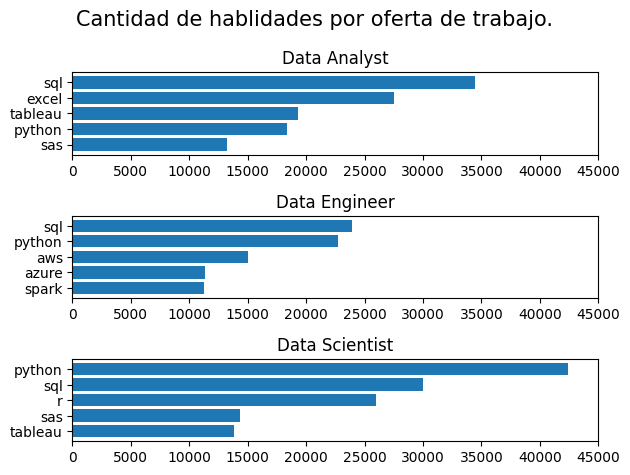

In [7]:
fig , ax = plt.subplots(len(job_titles), 1)

for i, job in enumerate(job_titles):
    df_plot = df_USA_EXP_skillcount[df_USA_EXP_skillcount['job_title_short'] == job].head(5)
    df_plot.plot(kind='barh',x='job_skills', y='skill_count', ax=ax[i], title=job,width=.8)
    fig.tight_layout()
    ax[i].tick_params(rotation=0)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,45000)
fig.suptitle('Cantidad de hablidades por oferta de trabajo.',fontsize=15)  
fig.tight_layout()
plt.show()  
   

In [8]:
df_USA_EXP_skillcount


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [9]:
df_job_count = df_USA.job_title_short.value_counts().reset_index(name='Job_count')
df_job_count

,job_title_short,Job_count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [10]:
job_perc = pd.merge(df_USA_EXP_skillcount,df_job_count,how='left',on='job_title_short')
job_perc

,job_skills,job_title_short,skill_count,Job_count
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [11]:
job_perc['job_skill_perce'] = 100 * job_perc['skill_count']/job_perc['Job_count']

In [12]:
job_perc.round(2)

,job_skills,job_title_short,skill_count,Job_count,job_skill_perce
0,python,Data Scientist,42379,58830,72.04
1,sql,Data Analyst,34452,67816,50.80
2,sql,Data Scientist,30034,58830,51.05
3,excel,Data Analyst,27519,67816,40.58
4,r,Data Scientist,26022,58830,44.23
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.01
1866,arch,Business Analyst,1,7382,0.01
1867,asana,Machine Learning Engineer,1,921,0.11
1868,no-sql,Machine Learning Engineer,1,921,0.11


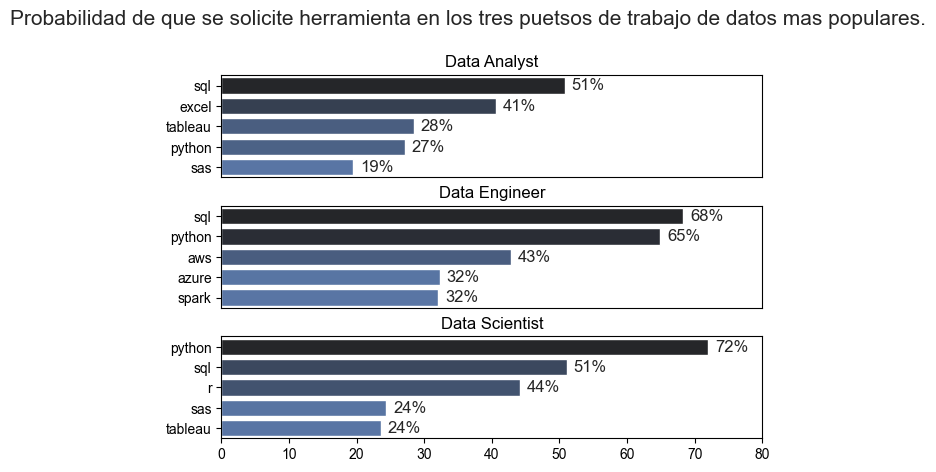

<Figure size 1000x1000 with 0 Axes>

In [13]:
fig , ax = plt.subplots(len(job_titles), 1)
plt.figure(figsize=(10,10))
sns.set_theme(style='ticks')

for i, job in enumerate(job_titles):
    df_plot1 = job_perc[job_perc['job_title_short'] == job].head(5).round(2)
    # df_plot.plot(kind='barh',x='job_skills', y='job_skill_oerce', ax=ax[i], title=job)
    sns.barplot(df_plot1,x='job_skill_perce', y='job_skills', hue='skill_count', ax=ax[i], palette='dark:b_r')
    fig.tight_layout()
    ax[i].set_title(job)
    # ax[i].tick_params(axis='y',rotation=5)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    # ax[i].xt
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for n, v in enumerate(df_plot1['job_skill_perce']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    if i != len(job_titles) - 1 :
        ax[i].set_xticks([])
fig.suptitle('Probabilidad de que se solicite herramienta en los tres puetsos de trabajo de datos mas populares.',fontsize=15)  
fig.tight_layout(h_pad=0.5)
plt.show()  